<a href="https://colab.research.google.com/github/AlexeyMM84/VKR/blob/main/VRKnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

БИБЛОТЕКИ

In [23]:
#Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [24]:
#Подклчаемся к гугл-диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#Считываем информацию 
bp=pd.read_excel('/content/drive/MyDrive/X_bp.xlsx', index_col=0)
nup=pd.read_excel('/content/drive/MyDrive/X_nup.xlsx', index_col=0)

In [26]:
#Смотрим на размерность массивов
bp.shape

(1023, 10)

In [27]:
nup.shape

(1040, 3)

In [28]:
#Объединяем массивы(т.к это единый набор данных)
df = nup.join(bp,  how='inner')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

In [30]:
df.duplicated().sum()

0

In [35]:
#Представление о распределении значений - описательная статистика
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",1023.0,44.252,45.016,0.000,0.000,0.000,90.000,90.000
Шаг нашивки,1023.0,6.899,2.563,0.000,5.080,6.916,8.586,14.441
Плотность нашивки,1023.0,57.154,12.351,0.000,49.799,57.342,64.945,103.989
Соотношение матрица-наполнитель,1023.0,2.930,0.913,0.389,2.318,2.907,3.553,5.592
"Плотность, кг/м3",1023.0,1975.735,73.729,1731.765,1924.155,1977.622,2021.374,2207.773
"модуль упругости, ГПа",1023.0,739.923,330.232,2.437,500.047,739.664,961.813,1911.536
"Количество отвердителя, м.%",1023.0,110.571,28.296,17.740,92.443,110.565,129.730,198.953
"Содержание эпоксидных групп,%_2",1023.0,22.244,2.406,14.255,20.608,22.231,23.962,33.000
"Температура вспышки, С_2",1023.0,285.882,40.943,100.000,259.067,285.897,313.002,413.273
"Поверхностная плотность, г/м2",1023.0,482.732,281.315,0.604,266.817,451.864,693.225,1399.542


1.Разведочный анализ данных:
1.1.Гистограммы распределения каждой переменной

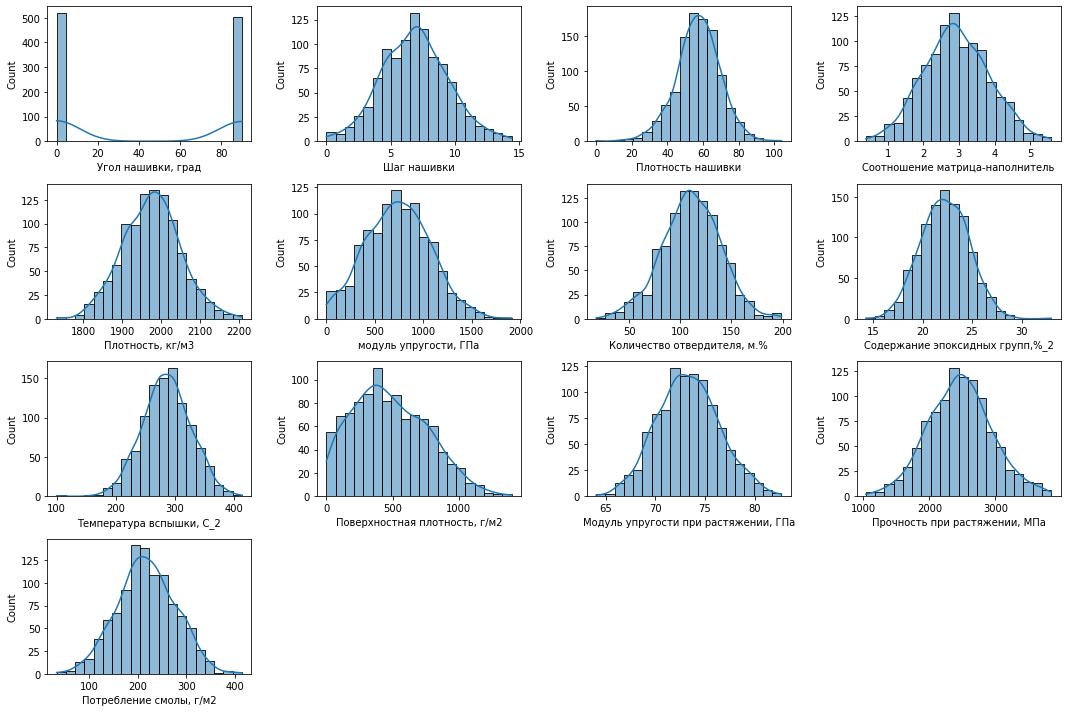

In [54]:
#Cтрою графики распределения переменных и "ящики с усами"
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=var_name, kde=True, bins=20)
    fig.tight_layout()
    plt.show()

draw_histograms(df, df.columns, 4, 4)

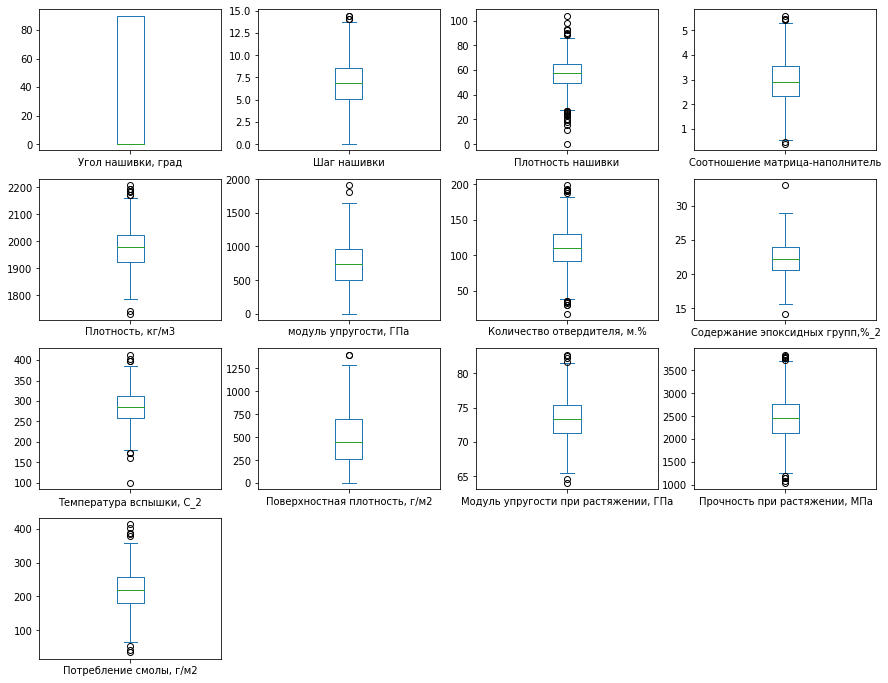

In [65]:
fig = plt.figure(figsize=(15,40))
total_axes = len(df.columns) 
subplt = 1 
for x in df.columns:
    ax = fig.add_subplot(total_axes, 4, subplt)
    df[x].plot(kind="box")
    subplt+=1
plt.show()